In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

def row_num(x=None): return pd.set_option('display.max_rows',x)
def col_num(x=None): return pd.set_option('display.max_columns',x)

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['axes.unicode_minus'] = False

# 1.DATA LOAD
---

In [2]:
df = pd.read_csv('./데이터정제_인구최종.csv', encoding='euc-kr')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   시군구코드            229 non-null    int64 
 1   시도명              229 non-null    object
 2   시군구명             229 non-null    object
 3   2019_노인청소년_예산    229 non-null    int64 
 4   2020_노인청소년_예산    229 non-null    int64 
 5   예산변화량            229 non-null    int64 
 6   2019_전체예산        229 non-null    int64 
 7   2020_전체예산        229 non-null    int64 
 8   2019_총인구         229 non-null    int64 
 9   2020_총인구         229 non-null    int64 
 10  2019_노인1인인구      229 non-null    int64 
 11  2020_노인1인인구      229 non-null    int64 
 12  2019_노인인구        229 non-null    int64 
 13  2020_노인인구        229 non-null    int64 
 14  총복지시설            229 non-null    int64 
 15  노인주거복지시설         229 non-null    int64 
 16  노인의료복지시설         229 non-null    int64 
 17  노인여가복지시설         229 non-null    in

In [5]:
# 분석에 활용되지 않는 데이터 삭제
df.drop('학대피해노인전용쉼터',axis=1,inplace=True)

# 2.데이터셋 살펴보기
---

## 2.1. 통계적 요약
---

In [9]:
# 예산 데이터 요약
df.iloc[:,3:8].describe()

,2019_노인청소년_예산,2020_노인청소년_예산,예산변화량,2019_전체예산,2020_전체예산
count,229.000000,229.000000,229.000000,2.290000e+02,2.290000e+02
mean,93452.344978,107022.598253,13570.253275,8.626660e+05,9.943650e+05
std,60184.802647,69259.111991,11040.745329,5.829622e+05,6.752019e+05
min,6129.000000,4917.000000,-21401.000000,1.957470e+05,2.332000e+05
25%,51856.000000,58349.000000,5596.000000,5.217080e+05,5.744000e+05
50%,79019.000000,87622.000000,11094.000000,6.913710e+05,7.928890e+05
75%,121003.000000,141078.000000,19017.000000,9.670050e+05,1.110601e+06
max,350570.000000,406408.000000,55838.000000,3.734150e+06,4.318930e+06


In [11]:
# 인구 데이터 요약
df.iloc[:,8:14].describe()

,2019_총인구,2020_총인구,2019_노인1인인구,2020_노인1인인구,2019_노인인구,2020_노인인구
count,2.290000e+02,2.290000e+02,229.000000,229.000000,229.000000,229.000000
mean,2.261101e+05,2.263281e+05,6693.655022,7252.013100,33407.895197,35052.030568
std,2.225959e+05,2.238576e+05,4425.314711,4904.576079,24767.418467,26321.440643
min,8.704000e+03,8.444000e+03,445.000000,507.000000,2290.000000,2341.000000
25%,5.088700e+04,5.019600e+04,3528.000000,3759.000000,14984.000000,15423.000000
50%,1.475000e+05,1.455880e+05,5460.000000,5966.000000,26572.000000,27615.000000
75%,3.470320e+05,3.510570e+05,9091.000000,9880.000000,47200.000000,49983.000000
max,1.214986e+06,1.210150e+06,27845.000000,30993.000000,131613.000000,140151.000000


In [12]:
# 복지 서비스 데이터 요약
df.iloc[:,14:].describe()

,총복지시설,노인주거복지시설,노인의료복지시설,노인여가복지시설,재가노인복지시설,노인일자리지원기관,치매전담형장기요양기관,총종사자수,노인주거복지시설종사자수,노인의료복지시설종사자수,노인여가복지시설종사자수,재가노인복지시설종사자수,노인일자리지원기관종사자수,치매전담형장기요양기관종사자수
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,347.458515,1.668122,24.144105,298.746725,21.052402,0.803493,0.960699,800.593886,14.567686,491.965066,40.144105,240.838428,7.986900,5.091703
std,200.252044,2.161036,26.636791,179.560420,19.508587,0.800650,1.528453,729.386173,22.996396,518.970893,48.833240,253.684230,11.835673,9.274345
min,30.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,23.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,198.000000,0.000000,8.000000,157.000000,8.000000,0.000000,0.000000,323.000000,0.000000,177.000000,9.000000,73.000000,0.000000,0.000000
50%,318.000000,1.000000,16.000000,276.000000,14.000000,1.000000,0.000000,595.000000,9.000000,306.000000,25.000000,153.000000,6.000000,0.000000
75%,435.000000,2.000000,30.000000,395.000000,27.000000,1.000000,1.000000,970.000000,18.000000,616.000000,55.000000,321.000000,10.000000,7.000000
max,1234.000000,9.000000,179.000000,1062.000000,118.000000,6.000000,10.000000,4501.000000,166.000000,3816.000000,329.000000,1650.000000,120.000000,62.000000


## 2.2. 분포 시각화
---

In [18]:
import warnings
warnings.simplefilter('ignore')

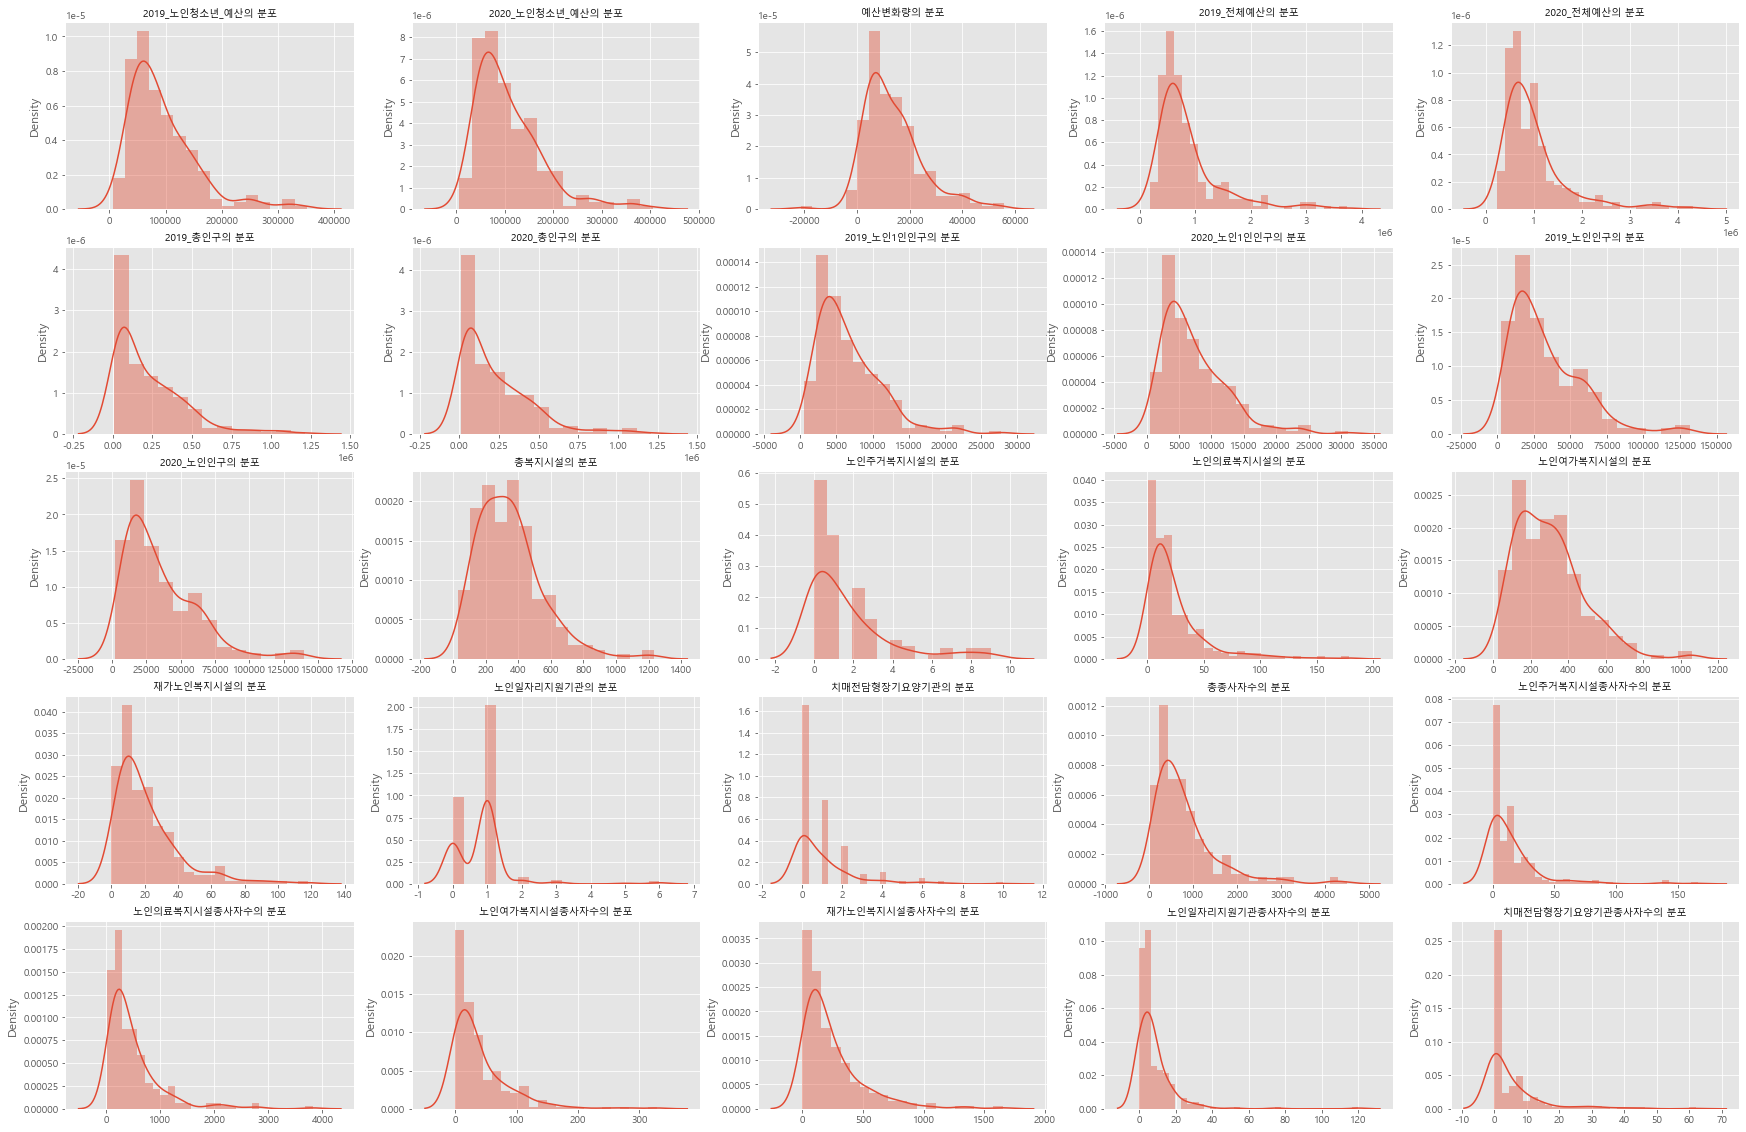

In [20]:
plt.rcParams['figure.figsize'] = (30,20)
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(5,5)
num_col = 3
for i in range(0,5):
    for j in range(0,5):
        ax[i][j].set_title(df.columns[num_col]+'의 분포', size=10)
        sns.distplot(ax=ax[i][j],x=df.iloc[:,num_col])
        num_col+=1
plt.show()

- 전반적으로 오른쪽으로 꼬리가 긴 형태
- 항목별로 세부적인 값 자체는 다르겠지만, 소수의 특정 지역이 각 컬럼에서 큰 값들을 갖는 것을 의미

## 2.3. 관계 시각화
---

In [22]:
df_cor = df.iloc[:,3:].corr()
row_num(10)
col_num(10)
df_cor

,2019_노인청소년_예산,2020_노인청소년_예산,예산변화량,2019_전체예산,2020_전체예산,...,노인의료복지시설종사자수,노인여가복지시설종사자수,재가노인복지시설종사자수,노인일자리지원기관종사자수,치매전담형장기요양기관종사자수
2019_노인청소년_예산,1.000000,0.995255,0.792129,0.828768,0.874511,...,0.772597,0.624185,0.589842,0.306804,0.359787
2020_노인청소년_예산,0.995255,1.000000,0.847757,0.816593,0.864528,...,0.772048,0.630040,0.592564,0.311279,0.363426
예산변화량,0.792129,0.847757,1.000000,0.604786,0.656133,...,0.631548,0.549739,0.501863,0.280235,0.318536
2019_전체예산,0.828768,0.816593,0.604786,1.000000,0.983439,...,0.736379,0.502166,0.452133,0.256821,0.331258
2020_전체예산,0.874511,0.864528,0.656133,0.983439,1.000000,...,0.757599,0.565229,0.493497,0.251915,0.352705
...,...,...,...,...,...,...,...,...,...,...,...
노인의료복지시설종사자수,0.772597,0.772048,0.631548,0.736379,0.757599,...,1.000000,0.561205,0.501057,0.249754,0.388316
노인여가복지시설종사자수,0.624185,0.630040,0.549739,0.502166,0.565229,...,0.561205,1.000000,0.424277,0.246638,0.336160
재가노인복지시설종사자수,0.589842,0.592564,0.501863,0.452133,0.493497,...,0.501057,0.424277,1.000000,0.164174,0.248727
노인일자리지원기관종사자수,0.306804,0.311279,0.280235,0.256821,0.251915,...,0.249754,0.246638,0.164174,1.000000,0.121759


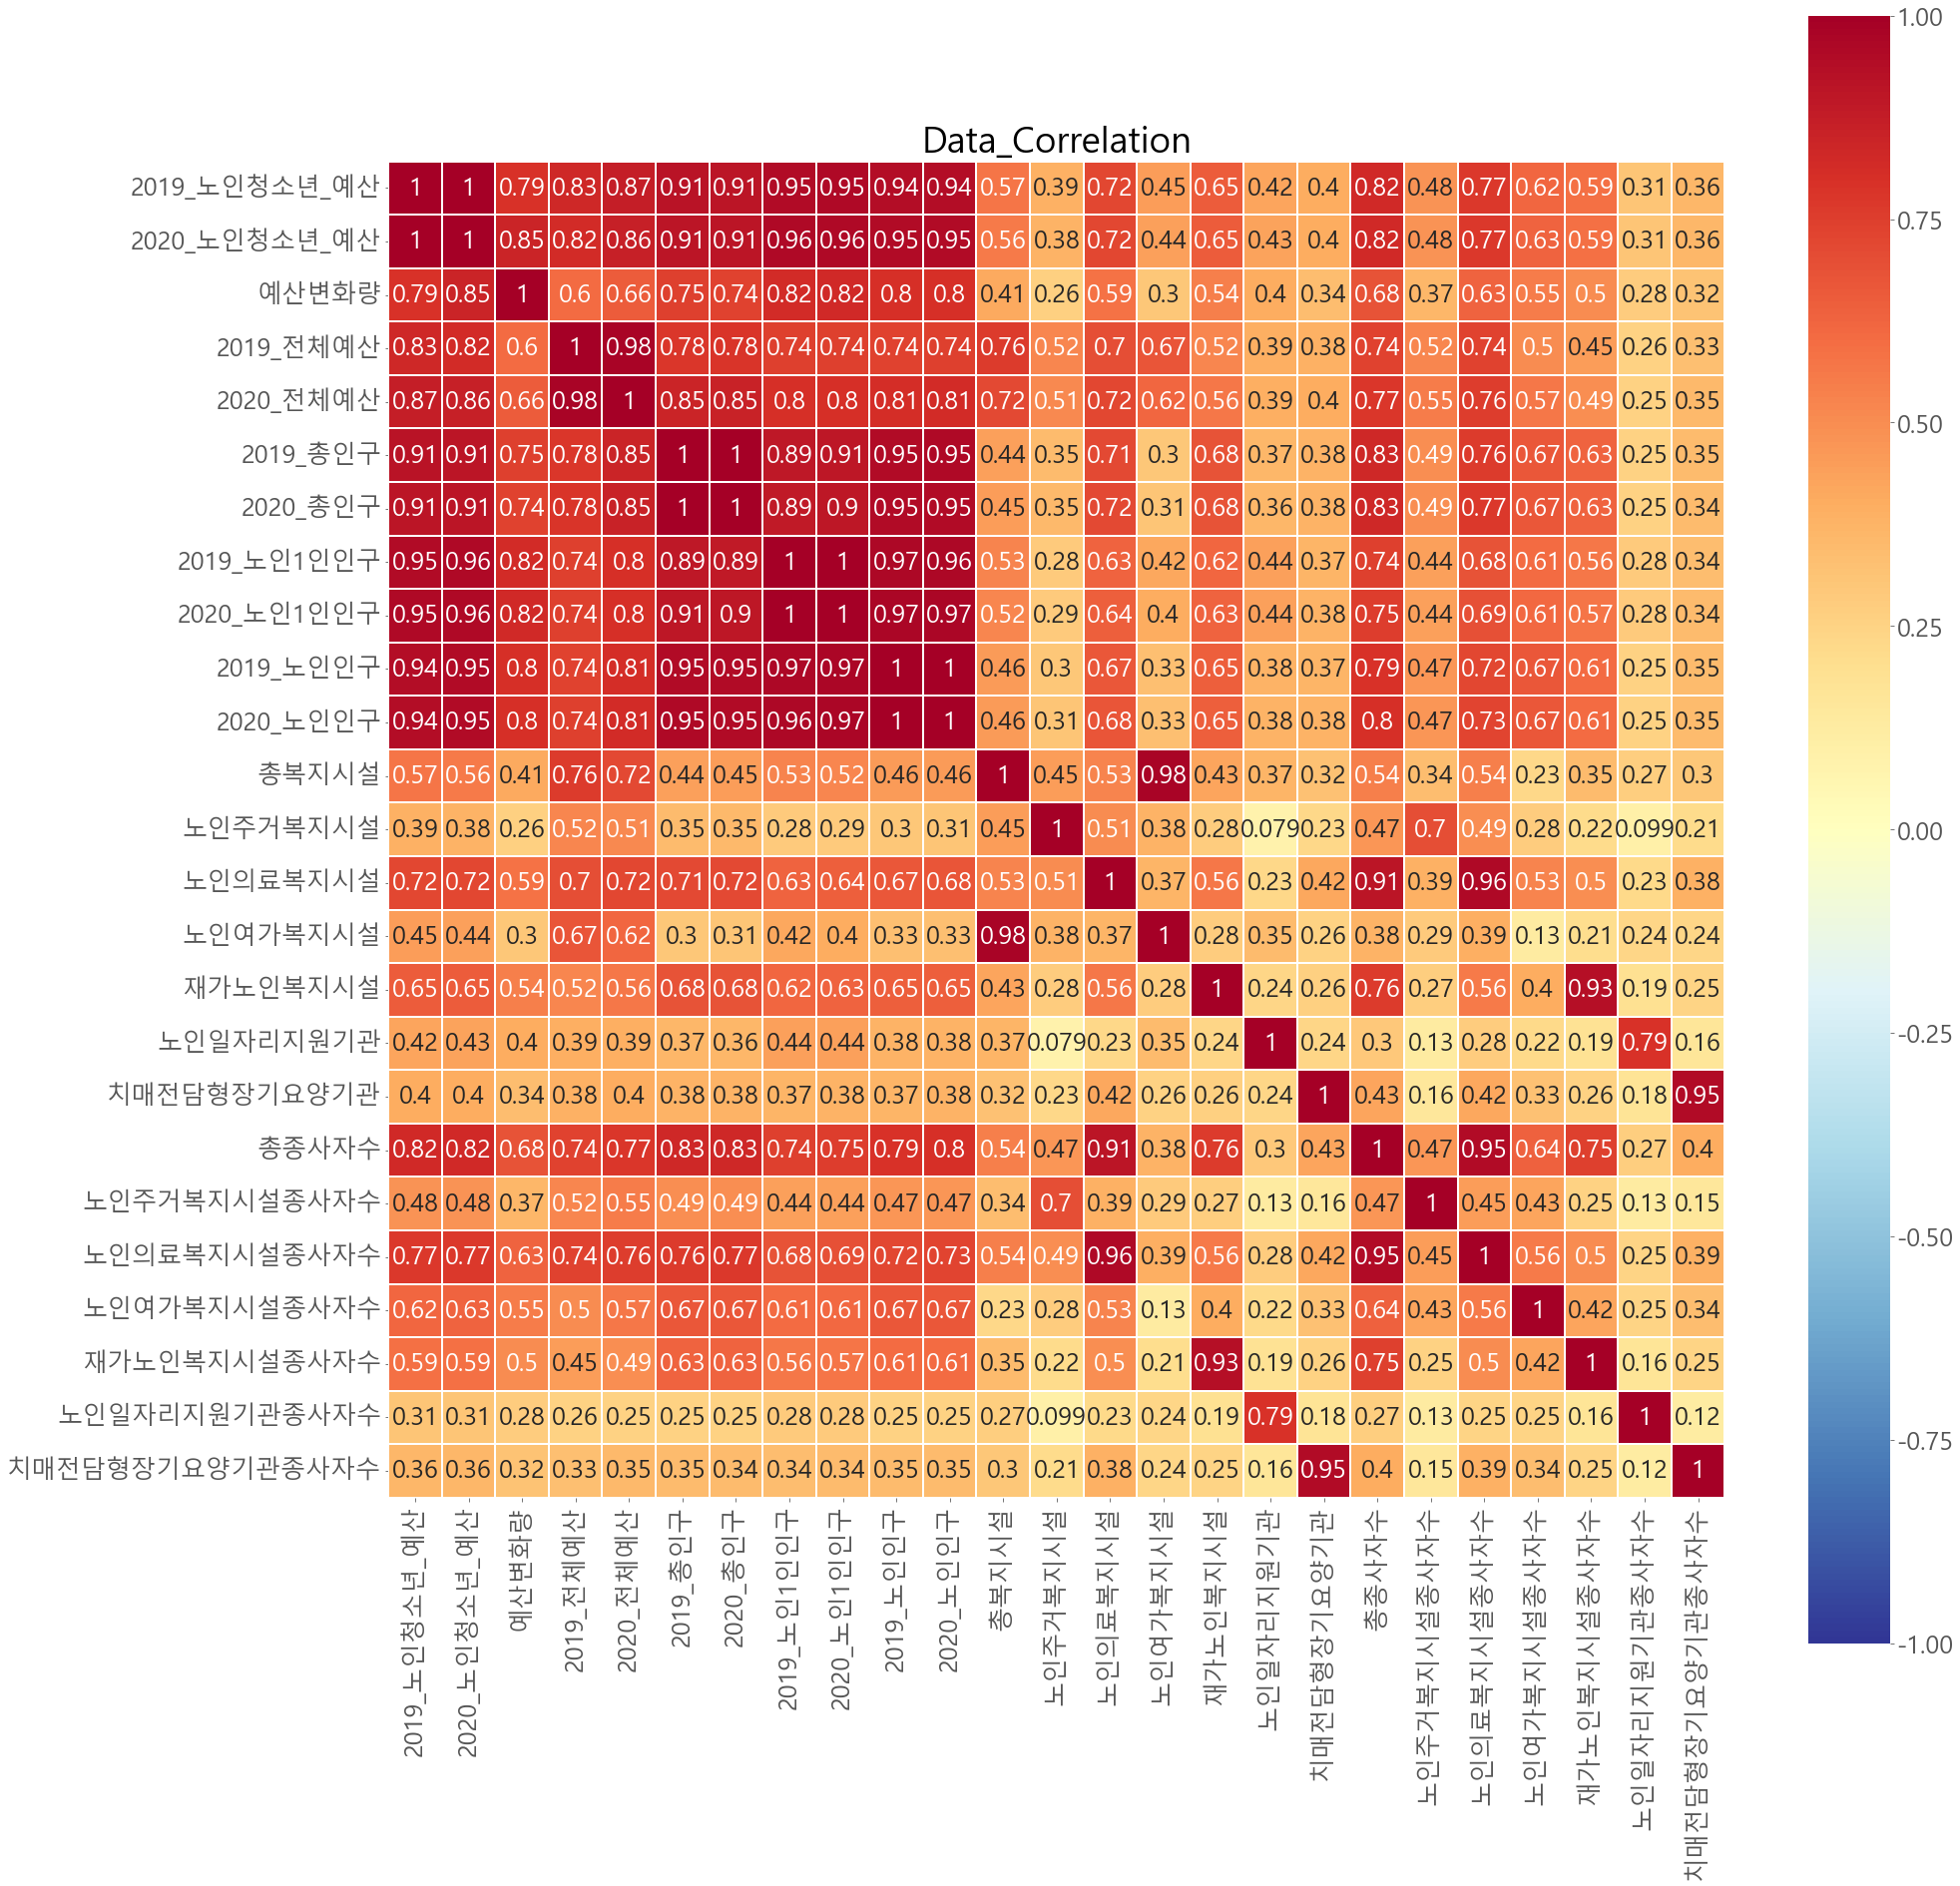

In [31]:
# 각 컬럼 별 히트맵
plt.rcParams['font.size'] = 25
plt.title('Data_Correlation')
color_map = plt.cm.RdYlBu_r
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(df_cor,
            annot=True,
            linewidth = 0.05,
            vmax = 1.0,
            vmin = -1.0,
            square=True,
            cmap=color_map)
plt.show()

- 전체적으로 음의 상관관계는 나타나지 않음
- 인구와 예산은 전반적으로 강한 양의 상관 관계를 보임
- 각 종류별 복지시설과 종사자수는 의외로 강한 양의 상관 관계를 보이지 않음

# 3.핸들링 데이터 EDA
---

In [32]:
df_handle = df.iloc[:,:3].copy()
df_handle['지역명'] = df_handle['시도명']+" "+df_handle['시군구명']
df_handle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구코드   229 non-null    int64 
 1   시도명     229 non-null    object
 2   시군구명    229 non-null    object
 3   지역명     229 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.3+ KB


In [33]:
# 노인 인구비, 노인 1인당 할당예산, 노인 복지 예산비 살펴보기
df_handle['노인인구비'] = df['2020_노인인구'].values/df['2020_총인구'].values # 노인인구비율
df_handle['노인1인할당예산'] = df['2020_노인인구'].values/df['2020_노인청소년_예산'] # 노인 1인당 할당 예산
df_handle['노인복지예산비'] = df['2020_노인청소년_예산'].values/df['2020_전체예산'] # 노인 복지 예산비
df_handle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구코드     229 non-null    int64  
 1   시도명       229 non-null    object 
 2   시군구명      229 non-null    object 
 3   지역명       229 non-null    object 
 4   노인인구비     229 non-null    float64
 5   노인1인할당예산  229 non-null    float64
 6   노인복지예산비   229 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.6+ KB


In [35]:
# 파생변수 요약
df_handle.iloc[:,4:].describe()

,노인인구비,노인1인할당예산,노인복지예산비
count,229.000000,229.000000,229.000000
mean,0.215815,0.332744,0.111609
std,0.090537,0.350232,0.040126
min,0.075784,0.186710,0.004879
25%,0.139856,0.249729,0.087727
50%,0.188780,0.297864,0.097944
75%,0.288236,0.346840,0.132375
max,0.429778,5.378890,0.222179


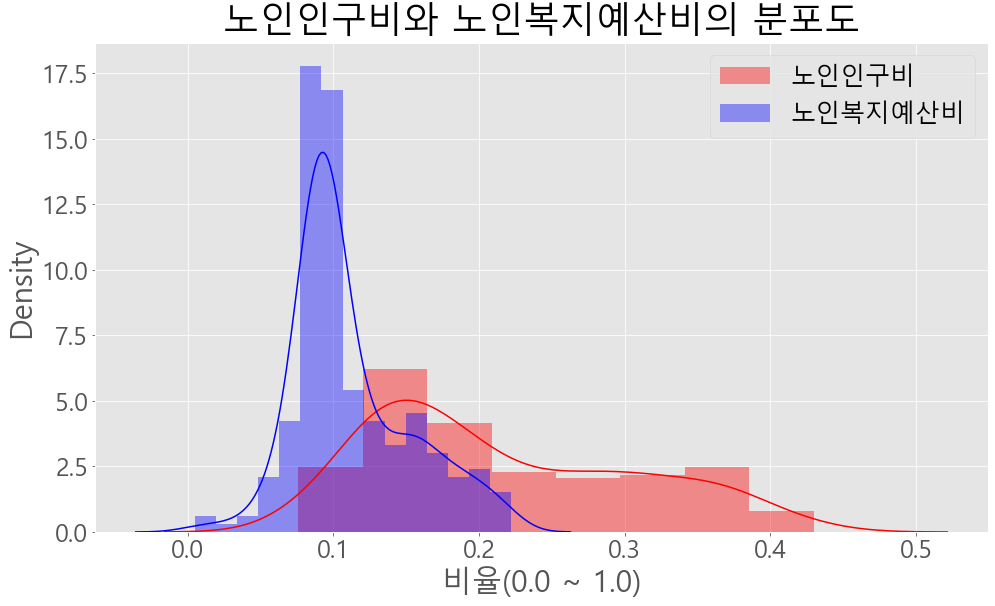

In [57]:
plt.rcParams['figure.figsize'] = (16,9)

plt.title('노인인구비와 노인복지예산비의 분포도')
sns.distplot(df_handle['노인인구비'],color='red',label='노인인구비')
sns.distplot(df_handle['노인복지예산비'],color='blue',label='노인복지예산비')
plt.xlabel('비율(0.0 ~ 1.0)')
plt.legend()
plt.show()

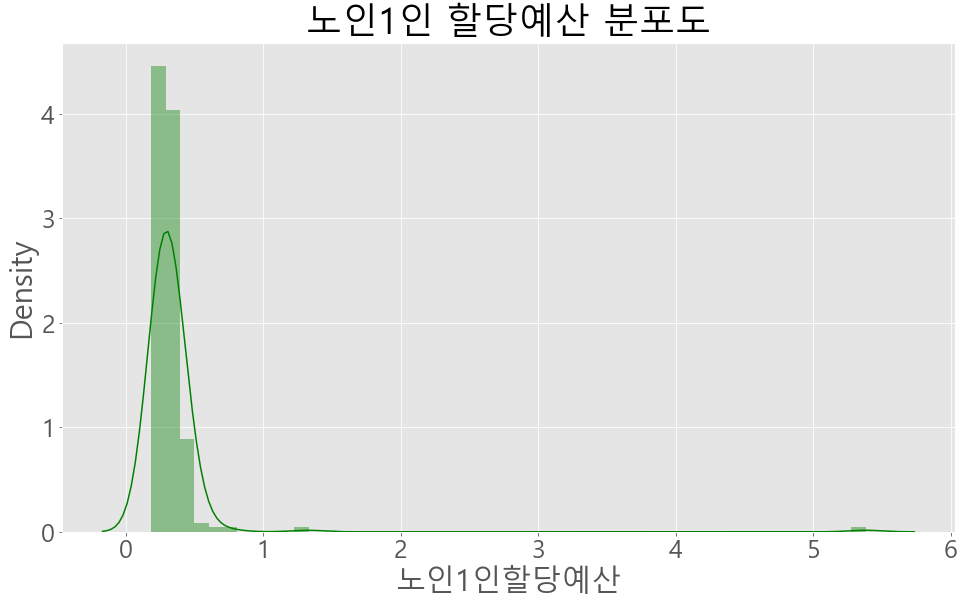

In [58]:
plt.title('노인1인 할당예산 분포도')
sns.distplot(df_handle['노인1인할당예산'],color='green')
plt.show()

# 4.지표값 확인해보기
---
- 지표 계산 수식을 엑셀과 태블로에서 계산
- 저장된 지표값 불러오기

In [59]:
df_score = pd.read_csv('./예산_복지서비스_평가지표.csv',encoding='euc-kr')
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시군구코드      229 non-null    int64  
 1   시도명        229 non-null    object 
 2   시군구명       229 non-null    object 
 3   예산인구평가지표   229 non-null    float64
 4   LHIi       229 non-null    float64
 5   LMIi       229 non-null    float64
 6   LLIi       229 non-null    float64
 7   LSIi       229 non-null    float64
 8   복지서비스평가지표  229 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 16.2+ KB


In [60]:
# 데이터 생김새
df_score.head() # 정규화되어 있지 않음

,시군구코드,시도명,시군구명,예산인구평가지표,LHIi,LMIi,LLIi,LSIi,복지서비스평가지표
0,31100,경기도,고양시,-0.0546,3.140788,6.109330,2.883547,0.531228,12.664893
1,38030,경상남도,진주시,0.0755,0.687180,1.118359,2.739271,1.814547,6.359357
2,31190,경기도,용인시,-0.0762,1.774307,3.907960,3.001383,2.632478,11.316128
3,31010,경기도,수원시,-0.0935,4.757533,2.591946,3.138880,0.688927,11.177285
4,35030,전라북도,익산시,0.0228,3.192070,0.772547,1.411789,0.994527,6.370933


## 4.1.Min-Max Sclae
---
- 평가지표의 점수화를 위해 최대 최소 표준화 수행

In [66]:
def min_max_scaler(arr):
    x_min, x_max = arr.min(), arr.max()
    return (arr-x_min)/(x_max-x_min)

df_score['복지서비스평가지표_MMS']=min_max_scaler(df_score['복지서비스평가지표'])*100
df_score['예산인구평가지표_MMS']=min_max_scaler(df_score['예산인구평가지표'])*100

In [67]:
df_score.head()

,시군구코드,시도명,시군구명,예산인구평가지표,LHIi,...,LLIi,LSIi,복지서비스평가지표,복지서비스평가지표_MMS,예산인구평가지표_MMS
0,31100,경기도,고양시,-0.0546,3.140788,...,2.883547,0.531228,12.664893,100.000000,55.682459
1,38030,경상남도,진주시,0.0755,0.687180,...,2.739271,1.814547,6.359357,61.103926,74.027073
2,31190,경기도,용인시,-0.0762,1.774307,...,3.001383,2.632478,11.316128,91.680064,52.636774
3,31010,경기도,수원시,-0.0935,4.757533,...,3.138880,0.688927,11.177285,90.823603,50.197406
4,35030,전라북도,익산시,0.0228,3.192070,...,1.411789,0.994527,6.370933,61.175334,66.596165


## 4.2.종합평가지표
---
- 종합 평가 지표는 복지서비스 평가지표와 예산 인구 평가지표의 조화평균을 활용
- 스케일링된 평가지표의 조화평균이기에 최종 결과는 스케일링하지 않음

In [74]:
df_score['종합평가지표'] = (2*df_score['복지서비스평가지표_MMS']*df_score['예산인구평가지표_MMS'])/(df_score['복지서비스평가지표_MMS']+df_score['예산인구평가지표_MMS'])
df_score.head()

,시군구코드,시도명,시군구명,예산인구평가지표,LHIi,...,LSIi,복지서비스평가지표,복지서비스평가지표_MMS,예산인구평가지표_MMS,종합평가지표
0,31100,경기도,고양시,-0.0546,3.140788,...,0.531228,12.664893,100.000000,55.682459,71.533376
1,38030,경상남도,진주시,0.0755,0.687180,...,1.814547,6.359357,61.103926,74.027073,66.947552
2,31190,경기도,용인시,-0.0762,1.774307,...,2.632478,11.316128,91.680064,52.636774,66.877058
3,31010,경기도,수원시,-0.0935,4.757533,...,0.688927,11.177285,90.823603,50.197406,64.658582
4,35030,전라북도,익산시,0.0228,3.192070,...,0.994527,6.370933,61.175334,66.596165,63.770757


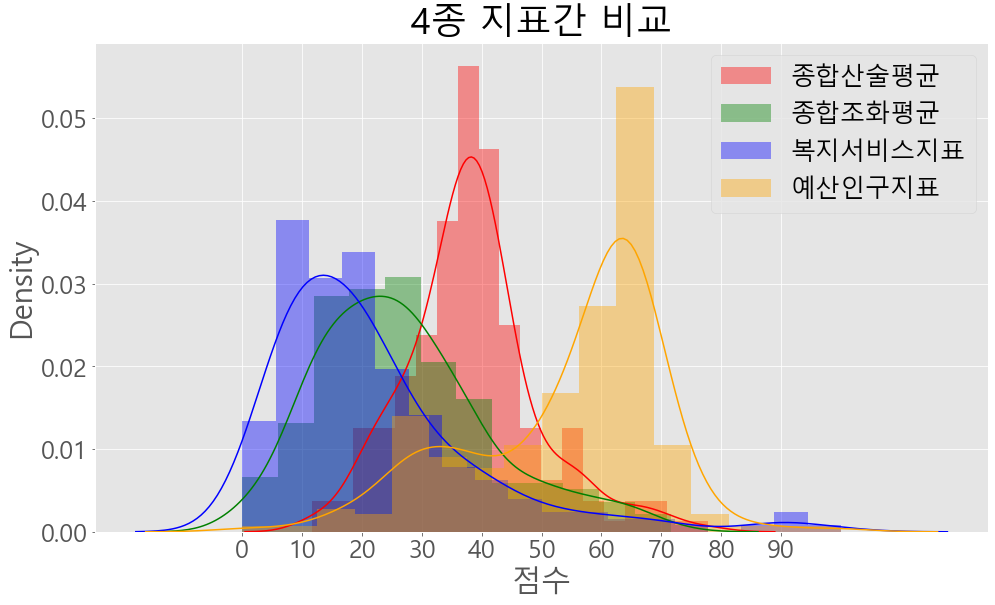

In [85]:
# 지표 간 비교
score_mean = df_score[['복지서비스평가지표_MMS','예산인구평가지표_MMS']].mean(axis=1)

plt.title('4종 지표간 비교')
sns.distplot(score_mean, color = 'red',label='종합산술평균')
sns.distplot(df_score['종합평가지표'], color = 'green',label='종합조화평균')
sns.distplot(df_score['복지서비스평가지표_MMS'], color = 'blue',label='복지서비스지표')
sns.distplot(df_score['예산인구평가지표_MMS'], color = 'orange',label='예산인구지표')
plt.xlabel('점수')
plt.xticks([i for i in range(0,100,10)])
plt.legend()
plt.show()